#Machine learning project on iris dataset

In [33]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style('darkgrid')

In [34]:
# Inbuilt datasets in seaborn library
 
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [35]:
## iris dataset

iris = sns.load_dataset('iris')

In [36]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
iris.shape

(150, 5)

In [38]:
# count the species present in species column

iris.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

#Visualizing the data 

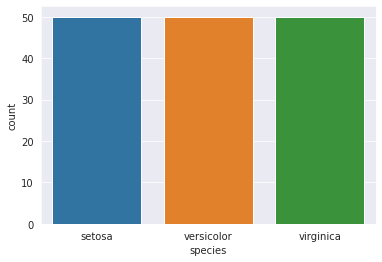

In [39]:
sns.countplot(x='species',data=iris)

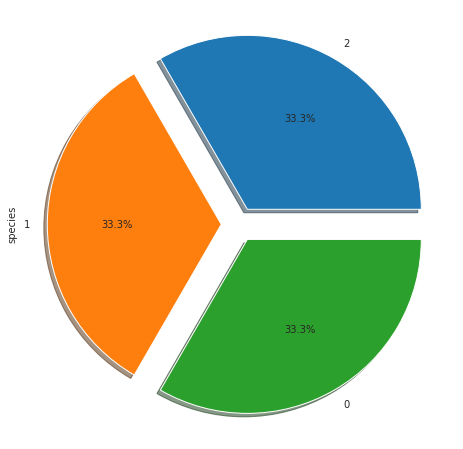

In [57]:
iris['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True, figsize=(10,8))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


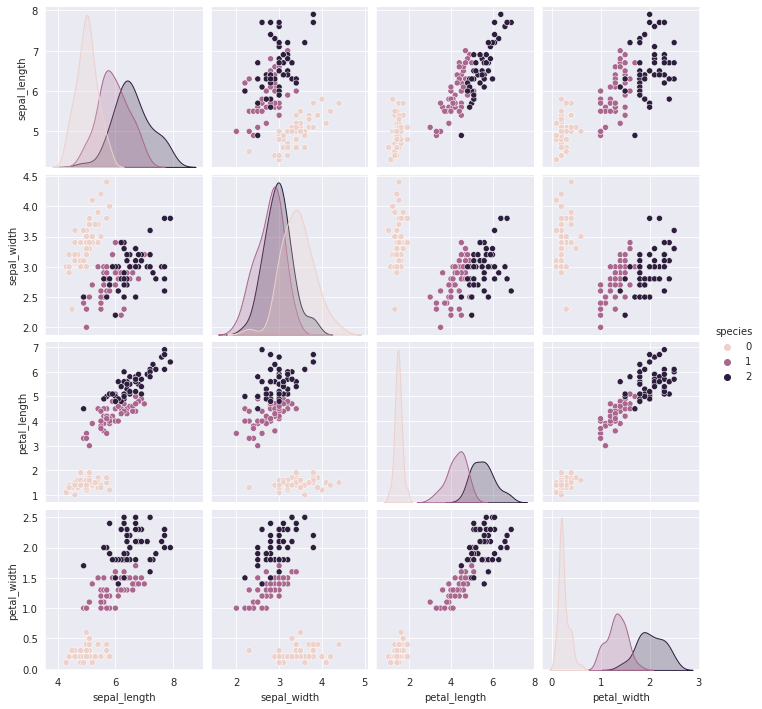

In [58]:
sns.pairplot(iris,hue='species',size=2.5)

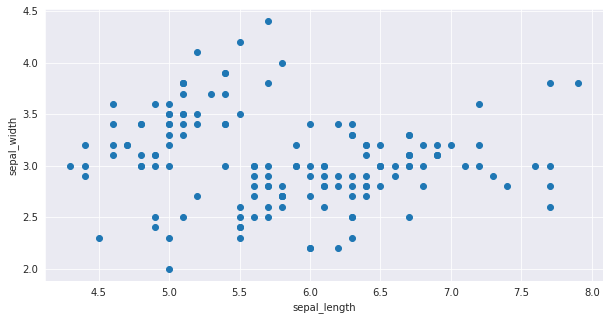

In [40]:
plt.figure(figsize=(10, 5))
plt.scatter(iris['sepal_length'], iris['sepal_width']);
plt.ylabel('sepal_width')
plt.xlabel('sepal_length');

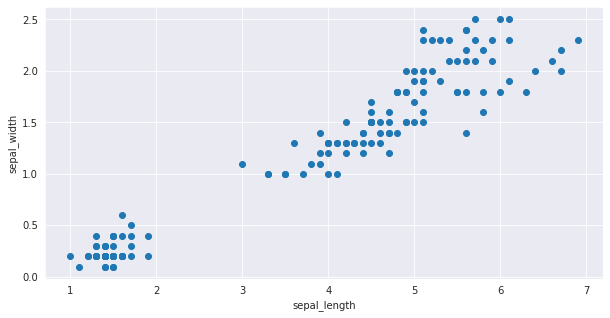

In [41]:
plt.figure(figsize=(10, 5))
plt.scatter(iris['petal_length'], iris['petal_width'], marker='o');
plt.ylabel('sepal_width')
plt.xlabel('sepal_length');

In [42]:
## checking the null values 
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [43]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [44]:
## converting species into label encoding

def map_species(f):
    if f == 'setosa':
        f = 0
    elif f == 'versicolor':
        f = 1
    elif f == 'virginica':
        f = 2
    return f

In [45]:
iris['species'] = data.species.map(map_species)

In [46]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

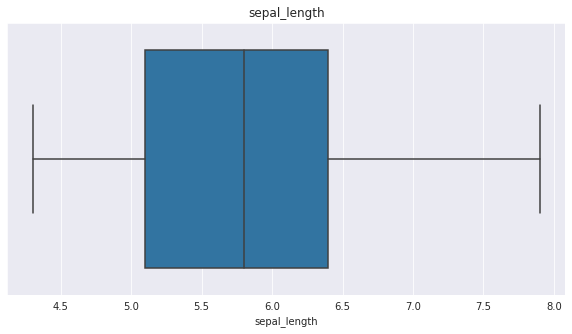

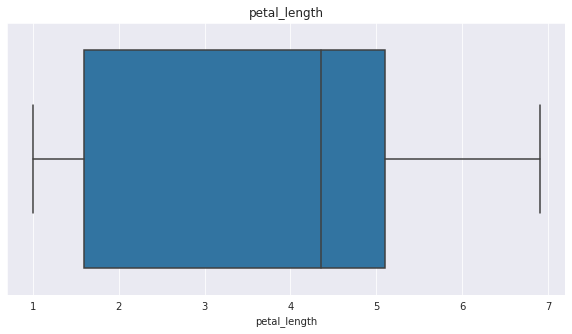

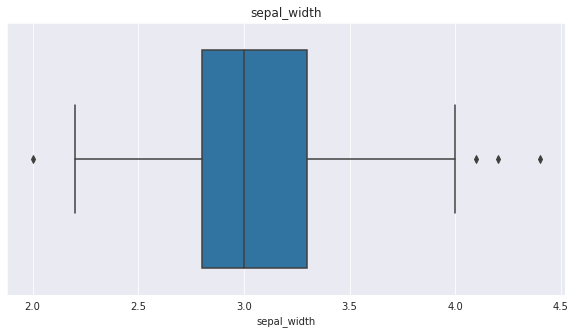

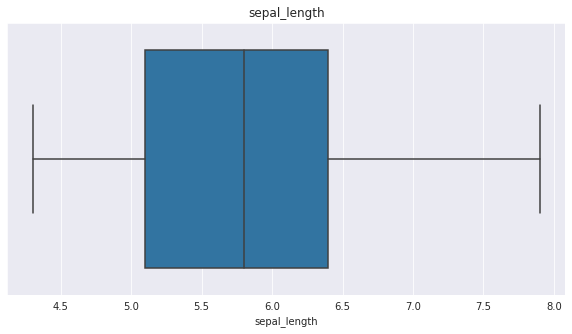

In [47]:
for f in ['sepal_length', 'petal_length', 'sepal_width', 'sepal_length']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[f])
    plt.title(f)

#Application of Meachine Learning

In [48]:
## independent and dependent features

X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

In [49]:
## preprocessing

sc = StandardScaler()
X = sc.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [52]:
lg = LogisticRegression()

In [53]:
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
pred = lg.predict(X_test)

--------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

------------------------------------------Accuracy Score---------------------------------------------------------
1.0
--------------------------------------------Confustion Matrix-----------------------------------------------------


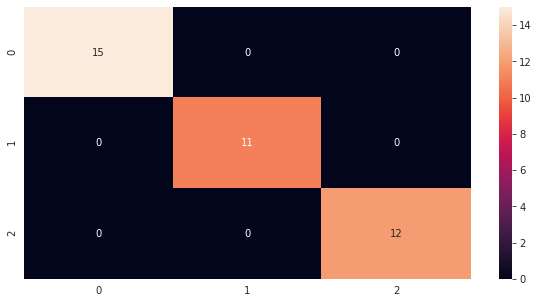

In [55]:
print("--------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))

print("------------------------------------------Accuracy Score---------------------------------------------------------")
print(accuracy_score(y_test, pred))

print("--------------------------------------------Confustion Matrix-----------------------------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True);

In [56]:
pd.DataFrame({'Actual': y_test,  'Predicted': pred}).head(50)

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1
